## Importar Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

## Cargar el Dataframe

In [6]:
#Cargar el data set
df = pd.read_csv('SampleSuperstore.csv')

#Verificar las primeras filas
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

## Verificación y Exploración de Datos

In [5]:
# Información básica del dataframe
print(df.info())

# Resumen estadístico basico
print(df.describe())

# Ver las columnas disponibles
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 9976 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9976 non-null   object 
 1   Segment       9976 non-null   object 
 2   Country       9976 non-null   object 
 3   City          9976 non-null   object 
 4   State         9976 non-null   object 
 5   Postal Code   9976 non-null   int64  
 6   Region        9976 non-null   object 
 7   Category      9976 non-null   object 
 8   Sub-Category  9976 non-null   object 
 9   Sales         9976 non-null   float64
 10  Quantity      9976 non-null   int64  
 11  Discount      9976 non-null   float64
 12  Profit        9976 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None
        Postal Code         Sales     Quantity     Discount       Profit
count   9976.000000   9976.000000  9976.000000  9976.000000  9976.000000
mean   55151.202285    230.147597     3.

## Identificar Valores Nulos y Duplicados

In [4]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas duplicadas
df = df.drop_duplicates()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


## Análisis de Columnas Importantes

In [6]:
# Revisar las categorias importantes
print(df['Category'].value_counts())

# Revisar las sub-categorías
print(df['Sub-Category'].value_counts())

Category
Office Supplies    6011
Furniture          2118
Technology         1847
Name: count, dtype: int64
Sub-Category
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      465
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


## Análisis de Ventas por Categoría

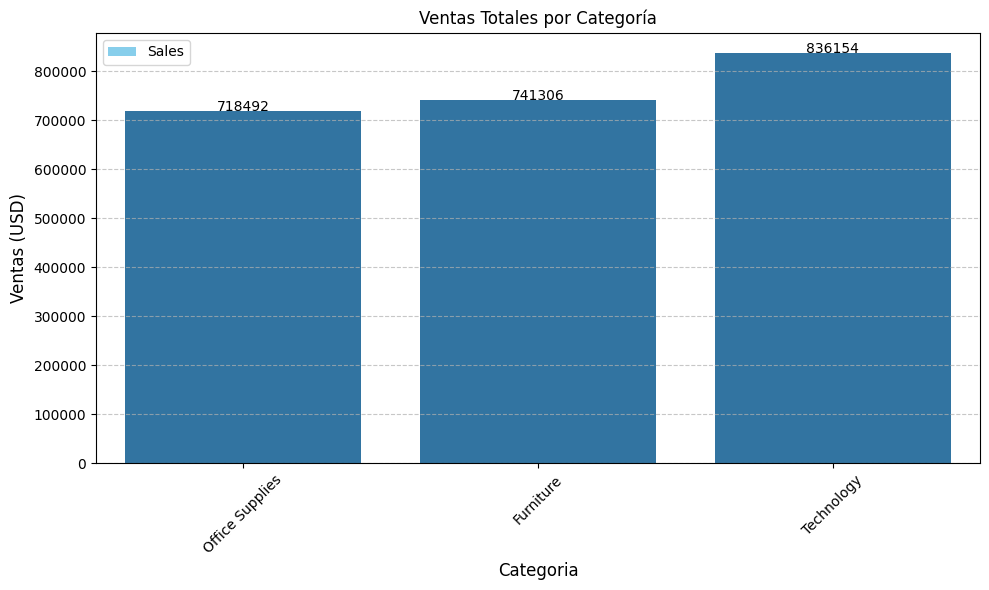

In [23]:
# Agrupar por categoría y calcular las ventas totales
category_sales = df.groupby('Category')['Sales'].sum().sort_values()

# Visualización de las ventas por categoría
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', color='skyblue')
sns.barplot(x=category_sales.index, y=category_sales.values)
for i, value in enumerate(category_sales):    # Anotar los valores directamente en las barras
    plt.text(i, value + 50, f'{value:.0f}', ha='center')  # 50 es el ajuste para la altura de la etiqueta
plt.title('Ventas Totales por Categoría', fontsize=12)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Ventas (USD)', fontsize=12)
plt.xticks(rotation=45)   # Mejorar la legibilidad de las etiquetas de regiones
plt.grid(axis='y', linestyle='--', alpha=0.7)    # Agregar rejilla para claridad
plt.tight_layout()   # Asegurarse de que los elementos no se corten
plt.show()

## Análisis de Rentabilidad por Región

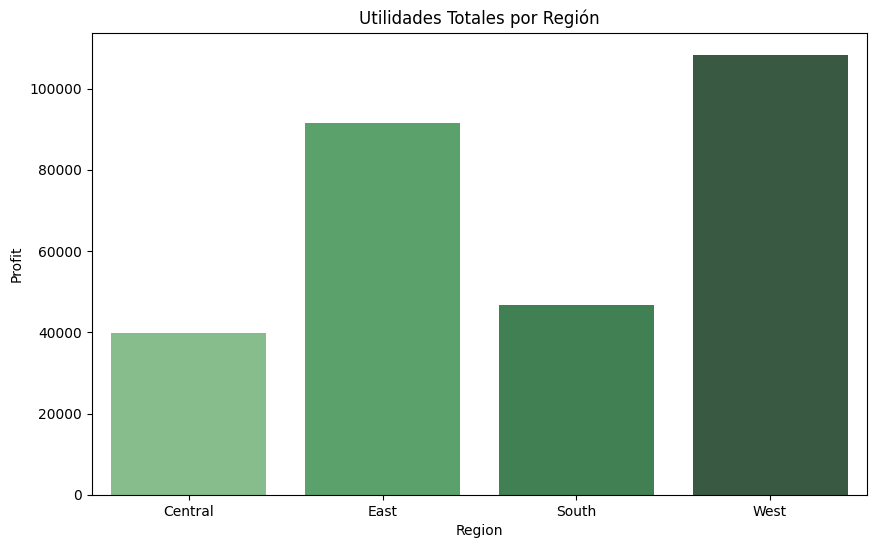

In [14]:
# Agrupar por región y calcular el beneficio total
df_region_profit = df.groupby('Region')['Profit'].sum()

# Visualización de las Utilidades por región
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit',
            data=pd.DataFrame({'Region': df_region_profit.index, 'Profit': df_region_profit.values}),
            hue='Region', palette='Greens_d', legend=False)
plt.title('Utilidades Totales por Región')
plt.show()

## Análisis de Correlaciones

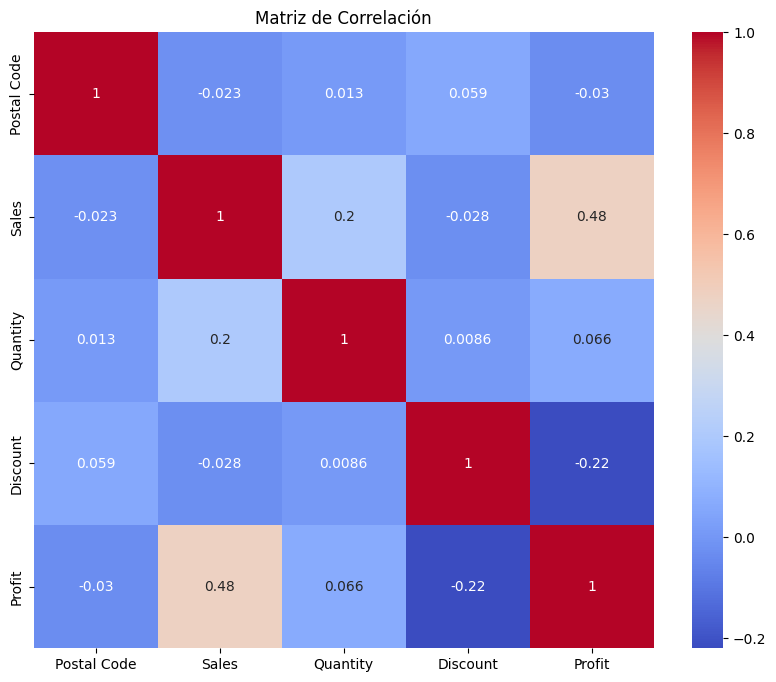

In [10]:
# Matriz de correlación
corr_matrix = df.select_dtypes(include=['float64','int64']).corr()

# Mapa de calor para visualizar las correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Predicción de Beneficios Basada en Ventas

Coeficiente: [[0.19317178]]
Intercepto: [-14.90884502]


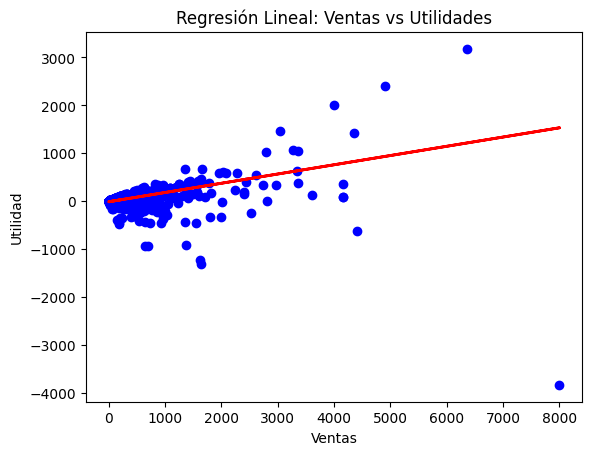

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir las variables independientes y dependientes
x = df[['Sales']]
y = df[['Profit']]

# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(x_test)

# Mostrar los resultados del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

# Visualización de los resultados
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.title('Regresión Lineal: Ventas vs Utilidades')
plt.xlabel('Ventas')
plt.ylabel('Utilidad')
plt.show()

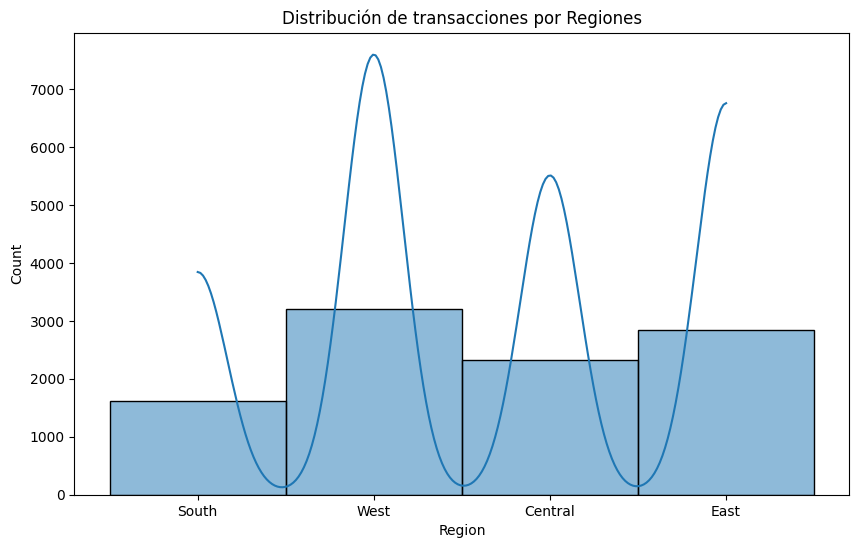

In [32]:
#Histograma por Regiones
plt.figure(figsize=(10,6))
sns.histplot(df['Region'], kde=True, bins=30)
plt.title('Distribución de transacciones por Regiones')
plt.show()

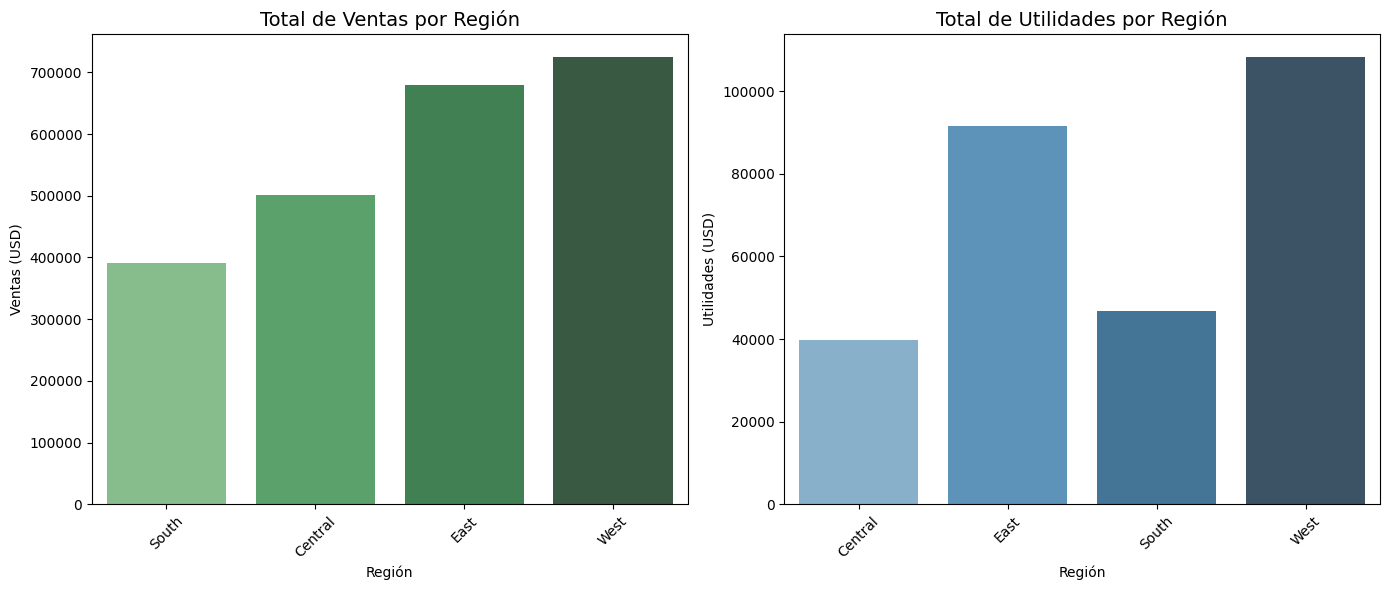

In [8]:
# Ejemplo con subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Ventas por Región
df_sales_region = df.groupby('Region')['Sales'].sum().sort_values()
sns.barplot(x='Region', y='Sales',
           data=pd.DataFrame({'Region': df_sales_region.index, 'Sales': df_sales_region.values}),
           hue='Region', palette='Greens_d', legend=False, ax=axes[0])
axes[0].set_title('Total de Ventas por Región', fontsize=14)
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Ventas (USD)')
axes[0].tick_params(axis='x', rotation=45)

# Utilidades por Región
df_region_profit = df.groupby('Region')['Profit'].sum()
sns.barplot(x='Region', y='Profit',
            data=pd.DataFrame({'Region': df_region_profit.index, 'Profit': df_region_profit.values}),
            hue='Region', palette='Blues_d', legend=False, ax=axes[1])
axes[1].set_title('Total de Utilidades por Región', fontsize=14)
axes[1].set_xlabel('Región')
axes[1].set_ylabel('Utilidades (USD)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Agrupar por categoría y calcular las ventas totales
category_sales = df.groupby('Category')['Sales'].sum().sort_values()

# Visualización interactiva de las ventas por categoría con Plotly
fig = px.bar(
    x=category_sales.index, 
    y=category_sales.values, 
    title='Total de Ventas por Categoría',
    labels={'x':'Categoría', 'y':'Ventas (USD)'}, 
    text=category_sales.values  # Mostrar los valores encima de las barras
)

# Actualización del diseño del gráfico
fig.update_traces(
    marker_color='indianred',     # Cambiar el color de las barras
    textposition='outside'        # Posición del texto fuera de las barras
)
fig.update_layout(
    xaxis_tickangle=-45,          # Rotar etiquetas del eje x para mayor claridad
    title_font_size=16,           # Tamaño del título
    xaxis_title_font_size=12,     # Tamaño de la etiqueta del eje x
    yaxis_title_font_size=12,     # Tamaño de la etiqueta del eje y
    plot_bgcolor='white'          # Fondo blanco para una visualización más clara
)

# Mostrar gráfico interactivo
fig.show()